# Cluster Analysis Obesity Level

### Strategy of the following work is
![](<Captura de ecrã 2025-10-16 230247.png>)


In [1]:
import pandas as pd
# ==========================
# DADOS SIMULADOS MANUAIS
# ==========================

sexo = [
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino"
]

idade = [
    22, 25, 28, 31, 35,
    40, 45, 50, 55, 60,
    23, 27, 32, 37, 42,
    47, 52, 57, 62, 30,
    34, 38, 43, 48, 53,
    58, 24, 29, 33, 36
]

# ============================================================
# PESO E ALTURA AJUSTADOS PARA SIMULAR GRUPOS DISTINTOS
# ============================================================

peso = [
    # Grupo 1 (saudáveis)
    62, 55, 68, 59, 66,
    61, 63, 58, 67, 60,
    # Grupo 2 (sobrepeso)
    78, 72, 83, 76, 81,
    79, 85, 74, 88, 80,
    # Grupo 3 (obesos)
    98, 105, 95, 110, 102,
    115, 131, 108, 108, 112
]

altura = [
    # Grupo 1 (saudáveis)
    1.72, 1.65, 1.75, 1.63, 1.70,
    1.68, 1.74, 1.64, 1.73, 1.66,
    # Grupo 2 (sobrepeso)
    1.74, 1.69, 1.80, 1.70, 1.75,
    1.78, 1.76, 1.71, 1.79, 1.74,
    # Grupo 3 (obesos)
    1.70, 1.68, 1.72, 1.65, 1.74,
    1.73, 1.75, 1.69, 1.70, 1.72
]

# ============================================================
# HISTORIAL DE OBESIDADE (1=Sim, 0=Não)
# ============================================================

historial_obesidade = [
    # Saudáveis
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    # Sobrepeso
    0, 1, 1, 0, 1,
    1, 1, 1, 0, 1,
    # Obesos
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
]

# ============================================================
# FREQUÊNCIAS (escala 1–4: 1=baixo, 4=alto)
# ============================================================

freq_agua = [
    # Saudáveis (bebem muita água)
    4, 4, 3, 4, 4,
    3, 4, 4, 3, 4,
    # Sobrepeso (moderado)
    3, 3, 2, 3, 2,
    3, 2, 3, 2, 2,
    # Obesos (pouca água)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_vegetais = [
    # Saudáveis (alto consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 3, 4,
    # Sobrepeso (médio)
    3, 2, 2, 3, 2,
    2, 3, 2, 3, 2,
    # Obesos (baixo)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_calorica = [
    # Saudáveis (baixo consumo)
    1, 1, 2, 1, 2,
    1, 2, 1, 1, 2,
    # Sobrepeso (moderado)
    3, 3, 3, 2, 3,
    3, 2, 3, 3, 2,
    # Obesos (elevado consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 4, 3
]

# ============================================================
# CRIAÇÃO DO DATAFRAME
# ============================================================

dados_simulados = pd.DataFrame({
    "Sexo": sexo,
    "Idade": idade,
    "Peso": peso,
    "Altura": altura,
    "Historial_Obesidade": historial_obesidade,
    "Freq_Consumo_Agua": freq_agua,
    "Freq_Consumo_Vegetais": freq_vegetais,
    "Freq_Consumo_Comida_Calorica": freq_calorica
})

dados_simulados.head(15)


,Sexo,Idade,Peso,Altura,Historial_Obesidade,Freq_Consumo_Agua,Freq_Consumo_Vegetais,Freq_Consumo_Comida_Calorica
0,Masculino,22,62,1.72,0,4,4,1
1,Feminino,25,55,1.65,0,4,4,1
2,Masculino,28,68,1.75,0,3,3,2
3,Feminino,31,59,1.63,0,4,4,1
4,Masculino,35,66,1.70,0,4,4,2
5,Feminino,40,61,1.68,0,3,4,1
6,Masculino,45,63,1.74,0,4,4,2
7,Feminino,50,58,1.64,0,4,4,1
8,Masculino,55,67,1.73,0,3,3,1
9,Feminino,60,60,1.66,0,4,4,2


In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Selecionar apenas as variáveis numéricas
X = dados_simulados[[
    "Idade", "Peso", "Altura",
    "Historial_Obesidade",
    "Freq_Consumo_Agua",
    "Freq_Consumo_Vegetais",
    "Freq_Consumo_Comida_Calorica"
]]


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()      #Normalizar os dados para não enviesar
X_scaled = scaler.fit_transform(X)


### Tipo de Linkage e Métrica

In [4]:
Z = linkage(X_scaled, method='complete', metric='euclidean')

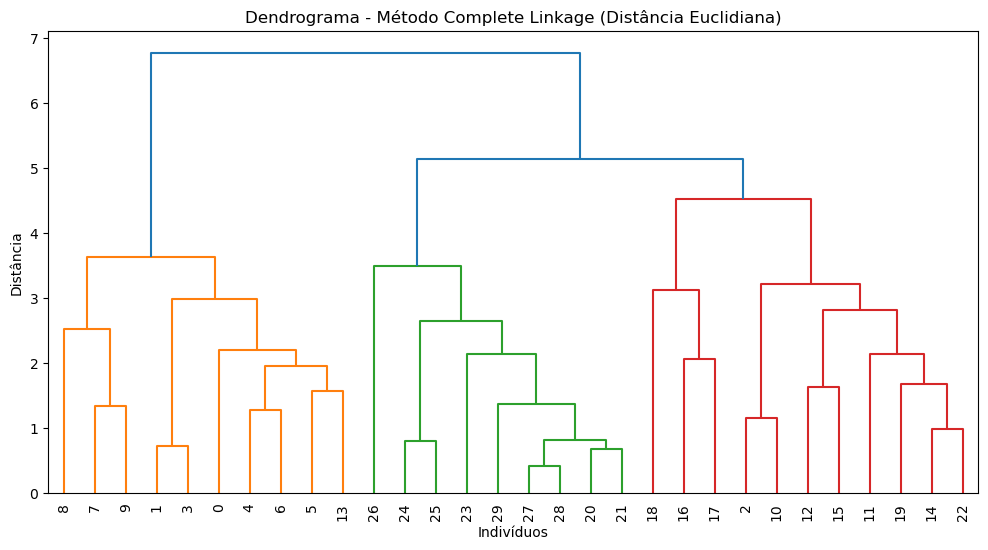

In [5]:
plt.figure(figsize=(12, 6))
plt.title("Dendrograma - Método Complete Linkage (Distância Euclidiana)")
plt.xlabel("Indivíduos")
plt.ylabel("Distância")

dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.show()


In [6]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, t=3, criterion='maxclust')
dados_simulados["Cluster_Hierarquico"] = clusters

dados_simulados.head(10)


,Sexo,Idade,Peso,Altura,Historial_Obesidade,Freq_Consumo_Agua,Freq_Consumo_Vegetais,Freq_Consumo_Comida_Calorica,Cluster_Hierarquico
0,Masculino,22,62,1.72,0,4,4,1,1
1,Feminino,25,55,1.65,0,4,4,1,1
2,Masculino,28,68,1.75,0,3,3,2,3
3,Feminino,31,59,1.63,0,4,4,1,1
4,Masculino,35,66,1.70,0,4,4,2,1
5,Feminino,40,61,1.68,0,3,4,1,1
6,Masculino,45,63,1.74,0,4,4,2,1
7,Feminino,50,58,1.64,0,4,4,1,1
8,Masculino,55,67,1.73,0,3,3,1,1
9,Feminino,60,60,1.66,0,4,4,2,1


In [7]:
dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Freq_Consumo_Vegetais", "Freq_Consumo_Comida_Calorica"]].mean()


,Peso,Freq_Consumo_Vegetais,Freq_Consumo_Comida_Calorica
Cluster_Hierarquico,,,
1,62.700000,3.800000,1.400000
2,109.888889,1.111111,3.888889
3,80.272727,2.363636,2.727273


In [8]:
# Labels reais (baseados nos grupos simulados)
labels_reais = [0]*10 + [1]*10 + [2]*10


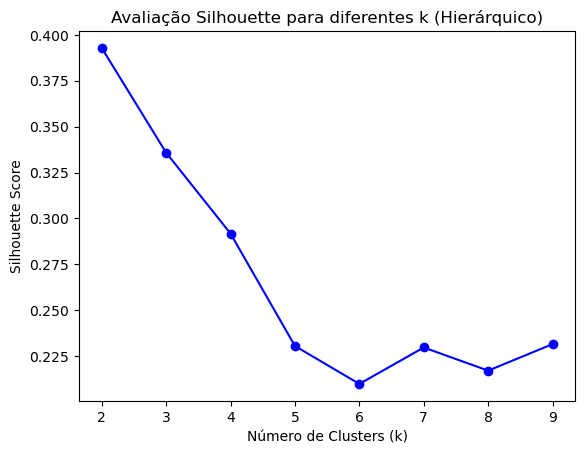

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.393)


In [9]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Distância e método de ligação
Z = linkage(X_scaled, method='complete', metric='euclidean')

# Testar diferentes números de clusters
sil_scores = []
k_values = range(2, 10)

for k in k_values:
    clusters = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(X_scaled, clusters)
    sil_scores.append(score)

# Gráfico Silhouette vs Nº de Clusters
plt.plot(k_values, sil_scores, 'bo-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Avaliação Silhouette para diferentes k (Hierárquico)")
plt.show()

# Melhor valor
k_otimo = k_values[sil_scores.index(max(sil_scores))]
print(f"➡️ Número inicial de clusters sugerido: {k_otimo} (Silhouette = {max(sil_scores):.3f})")


In [27]:
from sklearn.metrics import adjusted_rand_score

# Clusters obtidos com o número ótimo
clusters_hier = fcluster(Z, t=3, criterion='maxclust')

# Cálculo do ARI
ari = adjusted_rand_score(labels_reais, clusters_hier)
print(f"Adjusted Rand Index (ARI) = {ari:.3f}")


Adjusted Rand Index (ARI) = 0.705


In [28]:
dados_simulados["Cluster_Hierarquico"] = clusters_hier
dados_simulados["Grupo_Real"] = labels_reais

pd.crosstab(dados_simulados["Grupo_Real"], dados_simulados["Cluster_Hierarquico"])


Cluster_Hierarquico,1,2,3
Grupo_Real,,,
0,9,0,1
1,1,0,9
2,0,9,1


In [29]:
# Calcular centróides dos clusters calculados
centroides_calc = dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Altura"]].mean()

# Calcular centróides dos grupos reais
centroides_reais = dados_simulados.groupby("Grupo_Real")[["Peso", "Altura"]].mean()

print("Centroides dos clusters hierárquicos:\n", centroides_calc)
print("\nCentroides dos grupos reais:\n", centroides_reais)

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     62.700000  1.685000
2                    109.888889  1.706667
3                     80.272727  1.748182

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


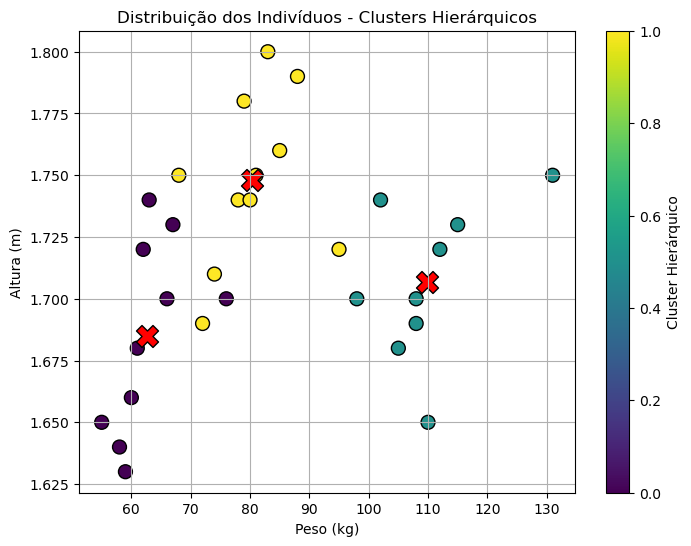

In [30]:
plt.figure(figsize=(8, 6))

# Gráfico de dispersão com cor baseada no cluster encontrado
plt.scatter(
    dados_simulados["Peso"],
    dados_simulados["Altura"],
    c=dados_simulados["Cluster_Hierarquico"],
    cmap="viridis",
    s=100,
    edgecolor="k"
)

# Centrões dos clusters
plt.scatter(
    centroides_calc["Peso"],
    centroides_calc["Altura"],
    c="red",
    s=250,
    marker="X",
    label="Centróide (Cluster Calculado)",
    edgecolor="k"
)

plt.title("Distribuição dos Indivíduos - Clusters Hierárquicos")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.colorbar(label="Cluster Hierárquico")
plt.grid(True)
plt.show()


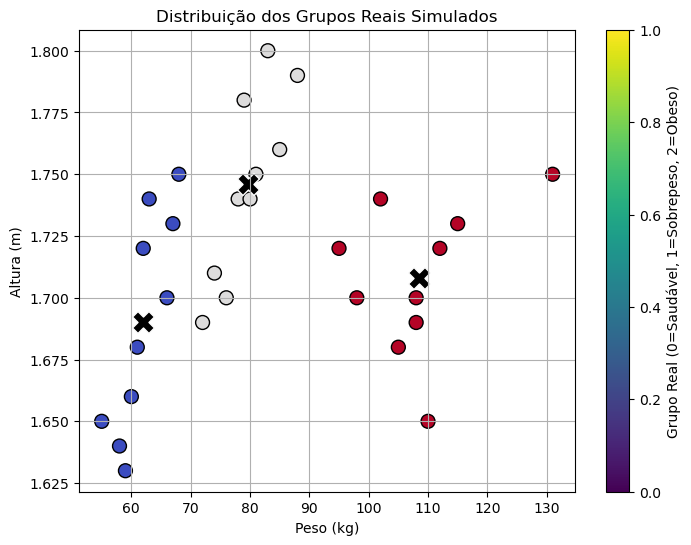

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(
    dados_simulados["Peso"],
    dados_simulados["Altura"],
    c=dados_simulados["Grupo_Real"],
    cmap="coolwarm",
    s=100,
    edgecolor="k"
)

# Centrões dos grupos reais
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="black",
    s=250,
    marker="X",
    label="Centróide (Grupo Real)",
    edgecolor="white"
)

plt.title("Distribuição dos Grupos Reais Simulados")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.colorbar(label="Grupo Real (0=Saudável, 1=Sobrepeso, 2=Obeso)")
plt.grid(True)
plt.show()
